# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# A Brief Project Description

In this __project__, we want to exlore some __basic properties__ of the __movies dataset__. In particular we want to __find out__, which __movies__, __directors__ and __actors__ are __more successfull__ than others in terms of categories such as __budget__, __revenue__, __rating__ and so on.

The __dataset__ that we are using __throughout this project__ together with a __detailed descrption__ can be found __here__:

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

## Data Import and first Inspection

1. __Importing__ the movies dataset from the CSV file "movies_complete.csv". __Inspecting__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

__Import__ all __required libraries__

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import HTML
pd.options.display.float_format = '{:.2f}'.format
import math

__Import__ the __csv-file__ as a __dataframe__

In [282]:
df = pd.read_csv("movies_complete.csv", parse_dates=["release_date"])
df 


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,...,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,...,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,...,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,...,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,...,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,...,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,...,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


We __check out__ some __basic properties__ of the dataframe.

In [283]:
df.tail(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,...,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,...,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,...,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,...,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov
44690,461257,Queerama,NaN,2017-06-09,NaN,NaN,en,NaN,NaN,NaN,...,NaN,0.16,75.00,50 years after decriminalisation of homosexual...,English,<img src='http://image.tmdb.org/t/p/w185//oxFE...,NaN,0,1,Daisy Asquith


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [285]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'budget_musd'}>],
       [<AxesSubplot:title={'center':'revenue_musd'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'cast_size'}>],
       [<AxesSubplot:title={'center':'crew_size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

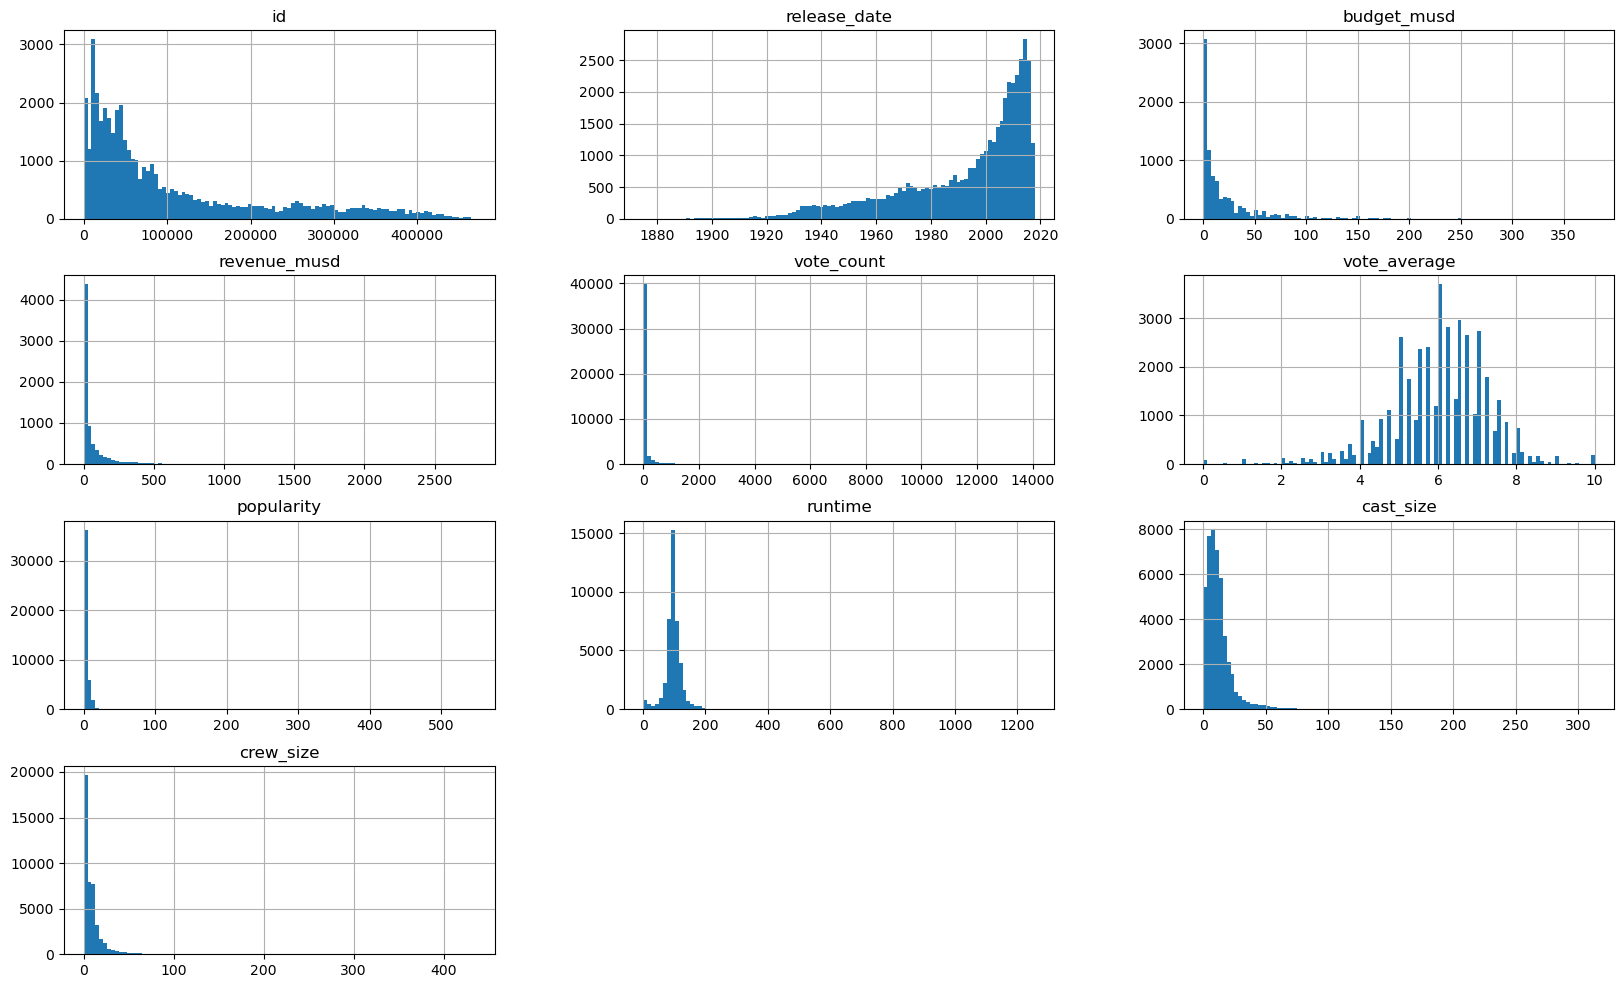

In [286]:
df.hist(figsize=(20,12), bins=100)

In [287]:
df.describe(include=object)

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [288]:
df["budget_musd"].value_counts(dropna=False)

NaN       35837
5.00        286
10.00       258
20.00       243
2.00        241
          ...  
82.50         1
270.00        1
0.00          1
72.50         1
1.25          1
Name: budget_musd, Length: 1219, dtype: int64

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

**Before** we start for finding out the **best/worst n movies**, we undertake some adjustments in order to  faciliate the process of calculation.

**Fill** all __missing values__ in the columns __revenue_musd__ and 'budget_musd' with a value of zero.

In [289]:
df_best_worst = df.copy()
df_best_worst['revenue_musd'] = df_best_worst['revenue_musd'].fillna(value=0)
df_best_worst['budget_musd'] = df_best_worst['budget_musd'].fillna(value=0) 

**Create** two additional columns for the purpose of **simplifing** upcoming calculations.

In [290]:
df_best_worst["Profit"] = df_best_worst['revenue_musd']-df_best_worst['budget_musd']
df_best_worst["Return on Investment"] = df_best_worst['revenue_musd'].div(df_best_worst['budget_musd']).replace(np.inf, 0)

Get rid of all columns that are not relevant for our calculations tasks.

In [291]:
df_adjust = df_best_worst.drop(['release_date', 'genres', 'original_language','production_companies', 'production_countries', 'runtime', 
         'overview', 'spoken_languages', 'cast', 'cast_size', 'director'], axis=1)

For the sake for **readability** we reset the index to movie titles.

In [292]:
df_adjust.set_index("title", inplace = True)

After all this adjustments our dataframe has the following properties.

In [293]:
df_adjust.head(5)

,id,tagline,belongs_to_collection,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,crew_size,Profit,Return on Investment
title,,,,,,,,,,,,
Toy Story,862,NaN,Toy Story Collection,30.00,373.55,5415.00,7.70,21.95,<img src='http://image.tmdb.org/t/p/w185//uXDf...,106,343.55,12.45
Jumanji,8844,Roll the dice and unleash the excitement!,NaN,65.00,262.80,2413.00,6.90,17.02,<img src='http://image.tmdb.org/t/p/w185//vgpX...,16,197.80,4.04
Grumpier Old Men,15602,Still Yelling. Still Fighting. Still Ready for...,Grumpy Old Men Collection,0.00,0.00,92.00,6.50,11.71,<img src='http://image.tmdb.org/t/p/w185//1FSX...,4,0.00,NaN
Waiting to Exhale,31357,Friends are the people who let you be yourself...,NaN,16.00,81.45,34.00,6.10,3.86,<img src='http://image.tmdb.org/t/p/w185//4wjG...,10,65.45,5.09
Father of the Bride Part II,11862,Just When His World Is Back To Normal... He's ...,Father of the Bride Collection,0.00,76.58,173.00,5.70,8.39,<img src='http://image.tmdb.org/t/p/w185//lf9R...,7,76.58,0.00


In [294]:
df_adjust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   tagline                20284 non-null  object 
 2   belongs_to_collection  4463 non-null   object 
 3   budget_musd            44691 non-null  float64
 4   revenue_musd           44691 non-null  float64
 5   vote_count             44691 non-null  float64
 6   vote_average           42077 non-null  float64
 7   popularity             44691 non-null  float64
 8   poster_path            44467 non-null  object 
 9   crew_size              44691 non-null  int64  
 10  Profit                 44691 non-null  float64
 11  Return on Investment   10868 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.4+ MB


For the sake of avoiding the **reuse of code** we define a **specified function** that will do the wanted operations 
for us.

In [295]:
def user_def(by, n, ascending, filter_bound):
    if filter_bound:
         df2 = df_adjust[df_adjust[by]>= 10]
    df2 = df_adjust.sort_values(by=[by], ascending = ascending).head(n)
    df2 = df2[["poster_path",by]]
    
    return HTML(df2.to_html(escape=False))    

__Movies Top 5 - Highest Revenue__

In [296]:
user_def('revenue_musd', 5, False, False)

,poster_path,revenue_musd
title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [297]:
user_def("budget_musd", 5, False, False)

,poster_path,budget_musd
title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


__Movies Top 5 - Highest Profit__

In [298]:
user_def("Profit", 5, False, True)

,poster_path,Profit
title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [299]:
user_def("Profit", 5, True, True)

,poster_path,Profit
title,,
The Lone Ranger,,-165.71
Pokémon the Movie: Hoopa and the Clash of Ages,,-150.00
The Wolfman,,-150.00
Band of Brothers,,-125.00
The Pacific,,-120.00


__Movies Top 5 - Highest ROI__

In [300]:
user_def("Return on Investment", 5, False, True)

,poster_path,Return on Investment
title,,
Less Than Zero,,12396383.00
Modern Times,,8500000.00
Welcome to Dongmakgol,,4197476.62
Aquí Entre Nos,,2755584.00
"The Karate Kid, Part II",,1018619.28


__Movies Top 5 - Lowest ROI__

In [301]:
user_def("Return on Investment", 5, True, True)

,poster_path,Return on Investment
title,,
The Walker,,0.00
Oxy-Morons,,0.00
Undertow,,0.00
Vera Drake,,0.00
Banshee Chapter,,0.00


__Movies Top 5 - Most Votes__

In [302]:
user_def("vote_count", 5, False, True)

,poster_path,vote_count
title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [303]:
user_def("vote_average", 5, False, True)

,poster_path,vote_average
title,,
Portrait of a Young Man in Three Movements,NaN,10.00
Brave Revolutionary,,10.00
Other Voices Other Rooms,,10.00
The Lion of Thebes,,10.00
Katt Williams: Priceless: Afterlife,,10.00


__Movies Top 5 - Lowest Rating__

In [304]:
user_def("vote_average", 5, True, True)

,poster_path,vote_average
title,,
"Dance, Fools, Dance",,0.00
.hack Liminality: In the Case of Mai Minase,,0.00
Lucrezia Borgia,,0.00
Joe and Max,,0.00
The Substitute,,0.00


__Movies Top 5 - Most Popular__

In [305]:
user_def("popularity", 5, False, True)  

,poster_path,popularity
title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [306]:
df_adjust_2 = df[["title","poster_path", "release_date", "genres", "revenue_musd", "vote_average", "production_companies", 
                  "runtime", "cast", "director", "spoken_languages", "vote_count"]].copy()


df_adjust_2.set_index("title", inplace=True)
df_adjust_2
#HTML(df_adjust_2.to_html(escape=False))

,poster_path,release_date,genres,revenue_musd,vote_average,production_companies,runtime,cast,director,spoken_languages,vote_count
title,,,,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,1995-10-30,Animation|Comedy|Family,373.55,7.70,Pixar Animation Studios,81.00,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,English,5415.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,1995-12-15,Adventure|Fantasy|Family,262.80,6.90,TriStar Pictures|Teitler Film|Interscope Commu...,104.00,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,English|Français,2413.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,1995-12-22,Romance|Comedy,NaN,6.50,Warner Bros.|Lancaster Gate,101.00,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch,English,92.00
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,1995-12-22,Comedy|Drama|Romance,81.45,6.10,Twentieth Century Fox Film Corporation,127.00,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,English,34.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,1995-02-10,Comedy,76.58,5.70,Sandollar Productions|Touchstone Pictures,106.00,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,English,173.00
...,...,...,...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaT,Drama|Family,NaN,4.00,NaN,90.00,Leila Hatami|Kourosh Tahami|Elham Korda,Hamid Nematollah,فارسی,1.00
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,2011-11-17,Drama,NaN,9.00,Sine Olivia,360.00,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,Lav Diaz,NaN,3.00
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,2003-08-01,Action|Drama|Thriller,NaN,3.80,American World Pictures,90.00,Erika Eleniak|Adam Baldwin|Julie du Page|James...,Mark L. Lester,English,6.00


Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)

In [307]:
df_bruce_willis =df_adjust_2[ (df_adjust_2["genres"].str.contains('Science Fiction', regex=False)==True) & 
                  (df_adjust_2["genres"].str.contains('Action', regex=False)==True) &
                  (df_adjust_2["cast"].str.contains('Bruce Willis', regex=False)==True)
                 ].sort_values(by="vote_average" ,ascending=False)

df_bruce_willis= df_bruce_willis[["poster_path", "genres", "vote_average"]]

HTML(df_bruce_willis.to_html(escape=False))


,poster_path,genres,vote_average
title,,,
The Fifth Element,,Adventure|Fantasy|Action|Thriller|Science Fiction,7.30
Looper,,Action|Thriller|Science Fiction,6.60
Armageddon,,Action|Thriller|Science Fiction|Adventure,6.50
Surrogates,,Action|Science Fiction|Thriller,5.90
G.I. Joe: Retaliation,,Adventure|Action|Science Fiction|Thriller,5.40
Vice,,Thriller|Science Fiction|Action|Adventure,4.10


Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)

In [308]:
df_uma_thurman = df_adjust_2[(df_adjust_2["cast"].str.contains("Uma Thurman", regex=True)==True) &
                            (df_adjust_2["director"].str.contains("Quentin Tarantino", regex=True)==True)
                            ].sort_values(by="runtime", ascending=True)

df_uma_thurman = df_uma_thurman[["poster_path", "runtime"]]

HTML(df_uma_thurman .to_html(escape=False))


,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue).

In [309]:
mask_time_period = df_adjust_2.release_date.between("2010-01-01","2015-12-31")

mask_pixar = df_adjust_2.production_companies.str.contains("Pixar")
 

df_pixar = df_adjust_2[mask_time_period & mask_pixar].sort_values(by="revenue_musd", ascending=False)
                          
df_pixar=df_pixar[["poster_path", "release_date", "revenue_musd"]]                          
HTML(df_pixar.to_html(escape=False))

,poster_path,release_date,revenue_musd
title,,,
Toy Story 3,,2010-06-16,1066.97
Inside Out,,2015-06-09,857.61
Monsters University,,2013-06-20,743.56
Cars 2,,2011-06-11,559.85
Brave,,2012-06-21,538.98
The Good Dinosaur,,2015-11-14,331.93
Day & Night,,2010-06-17,NaN
The Blue Umbrella,,2013-02-12,NaN
Toy Story of Terror!,,2013-10-15,NaN


Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)

In [310]:
mask_action = df_adjust_2.genres.str.contains("Action")
mask_thriller = df_adjust_2.genres.str.contains("Thriller")
mask_english = df_adjust_2.spoken_languages == "English"
mask_rating = df_adjust_2.vote_average >= 7.5
mak_vote_count = df_adjust_2.vote_count >= 10


df_english = df_adjust_2.loc[(mask_action | mask_thriller) & mask_rating & mask_english & mak_vote_count]


df_english = df_english[["poster_path","genres", "spoken_languages", "vote_average", "vote_count", "release_date"]].sort_values(by="release_date", ascending=False).head(5)

HTML(df_english.to_html(escape=False))

,poster_path,genres,spoken_languages,vote_average,vote_count,release_date
title,,,,,,
The Book of Henry,,Thriller|Drama|Crime,English,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,English,7.60,4858.00,2017-04-19
The Thinning,,Thriller,English,7.60,92.00,2016-10-12
11.22.63,,Drama|History|Thriller,English,8.00,213.00,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,English,7.50,7993.00,2015-12-15


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

Before we start to examine dataset, we do some simplification that ease the data presentation.

In [311]:

df_success =  pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

df_success = df_success [["title","poster_path","revenue_musd","belongs_to_collection","budget_musd", "popularity", "vote_average"]]
#df_success.set_index('title', inplace=True)
df_success


,title,poster_path,revenue_musd,belongs_to_collection,budget_musd,popularity,vote_average
0,Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,373.55,Toy Story Collection,30.00,21.95,7.70
1,Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,262.80,NaN,65.00,17.02,6.90
2,Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,Grumpy Old Men Collection,NaN,11.71,6.50
3,Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,81.45,NaN,16.00,3.86,6.10
4,Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,76.58,Father of the Bride Collection,NaN,8.39,5.70
...,...,...,...,...,...,...,...
44686,Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,NaN,0.07,4.00
44687,Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,NaN,0.18,9.00
44688,Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,NaN,0.90,3.80
44689,Satan Triumphant,<img src='http://image.tmdb.org/t/p/w185//aorB...,NaN,NaN,NaN,0.00,NaN


__Franchise vs. Stand-alone: Average Revenue__

In [312]:
def assign(collection):
    collection = str(collection)
    if collection == "nan":
        return "no collection"
    else:
        return "collection"

In [313]:
df_success["belongs_to_collection"] = df_success["belongs_to_collection"].apply(assign)

In [314]:
df_success["belongs_to_collection"].value_counts()

no collection    40228
collection        4463
Name: belongs_to_collection, dtype: int64

In [315]:
df_success.groupby("belongs_to_collection")["revenue_musd"].mean()

belongs_to_collection
collection      165.71
no collection    44.74
Name: revenue_musd, dtype: float64

Comparing Franchise vs. Stand-alone in terms of revenue, **Franchise** is obviously **more successfull**.

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [316]:
df_success["Return on Investment"] = df_success['revenue_musd'].div(df_success['budget_musd']) 

In [317]:
df_success.groupby("belongs_to_collection")["Return on Investment"].median()

belongs_to_collection
collection      3.71
no collection   1.62
Name: Return on Investment, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [318]:
df_success.groupby("belongs_to_collection")["budget_musd"].mean()

belongs_to_collection
collection      38.32
no collection   18.05
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [319]:
df_success.groupby("belongs_to_collection")["popularity"].mean()

belongs_to_collection
collection      6.25
no collection   2.59
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [320]:
df_success.groupby("belongs_to_collection")["vote_average"].mean()

belongs_to_collection
collection      5.96
no collection   6.01
Name: vote_average, dtype: float64

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [321]:
df_success = df.copy()  

The __most successful Franchises__ in terms of total number of movies

In [322]:
df_success["belongs_to_collection"].value_counts(dropna=True)

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

The __most successful Franchises__ in terms of __total budget__

In [323]:
df_col = df_success[df_success["belongs_to_collection"].notnull()]
df_col.groupby("belongs_to_collection")["budget_musd"].sum().sort_values(ascending =False, na_position='last').head(10)

belongs_to_collection
James Bond Collection                 1539.65
Harry Potter Collection               1280.00
Pirates of the Caribbean Collection   1250.00
The Fast and the Furious Collection   1009.00
X-Men Collection                       983.00
Transformers Collection                965.00
Star Wars Collection                   854.35
The Hobbit Collection                  750.00
The Terminator Collection              661.40
Mission: Impossible Collection         650.00
Name: budget_musd, dtype: float64

The __most successful Franchises__ in terms of __mean budget__

In [324]:
df_col.groupby("belongs_to_collection")["budget_musd"].mean().sort_values(ascending = False, na_position='last').head(10)

belongs_to_collection
Tangled Collection                    260.00
The Avengers Collection               250.00
Pirates of the Caribbean Collection   250.00
The Hobbit Collection                 250.00
Man of Steel Collection               237.50
Avatar Collection                     237.00
The Amazing Spider-Man Collection     207.50
World War Z Collection                200.00
Spider-Man Collection                 199.00
The Dark Knight Collection            195.00
Name: budget_musd, dtype: float64

The __most successful Franchises__ in terms of __total revenue__

In [325]:
df_col.groupby("belongs_to_collection")["revenue_musd"].sum().sort_values(ascending=False, na_position="last").head(10)

belongs_to_collection
Harry Potter Collection               7707.37
Star Wars Collection                  7434.49
James Bond Collection                 7106.97
The Fast and the Furious Collection   5125.10
Pirates of the Caribbean Collection   4521.58
Transformers Collection               4366.10
Despicable Me Collection              3691.07
The Twilight Collection               3342.11
Ice Age Collection                    3216.71
Jurassic Park Collection              3031.48
Name: revenue_musd, dtype: float64

The __most successful Franchises__ in terms of __mean revenue__

In [326]:
df_col.groupby("belongs_to_collection")["revenue_musd"].mean().sort_values(ascending=False, na_position ="last").head(10)

belongs_to_collection
Avatar Collection                     2787.97
The Avengers Collection               1462.48
Frozen Collection                     1274.22
Finding Nemo Collection                984.45
The Hobbit Collection                  978.51
The Lord of the Rings Collection       972.18
Harry Potter Collection                963.42
Star Wars Collection                   929.31
Despicable Me Collection               922.77
Pirates of the Caribbean Collection    904.32
Name: revenue_musd, dtype: float64

The __most successful Franchises__ in terms of __mean rating__

In [327]:
df_col.groupby("belongs_to_collection")["vote_average"].mean().sort_values(ascending=False, na_position ="last").head(10)

belongs_to_collection
Argo Collection                       9.30
Bloodfight                            9.00
Kenji Misumi's Trilogy of the Sword   9.00
Dreileben                             9.00
Алиса в стране чудес (Коллекция)      8.70
We Were Here                          8.65
Kizumonogatari                        8.63
Spirits' Homecoming Collection        8.50
Glass Tiger collection                8.50
OSS 117 The Original Saga             8.50
Name: vote_average, dtype: float64

We still make a further distinction by taking only those collection into account, that have an vote count above 1000.

In [328]:
df_new_col = df_col[df_col["vote_count"]>=1000]
df_new_col.groupby("belongs_to_collection")["vote_average"].mean().sort_values(ascending=False, na_position ="last").head(10)

belongs_to_collection
Psycho Collection                  8.30
The Man With No Name Collection    8.10
The Lord of the Rings Collection   8.03
The Vengeance Collection           8.00
The Godfather Collection           7.97
The Space Odyssey Series           7.90
Blade Runner Collection            7.90
Trainspotting Collection           7.80
The Thing Collection               7.80
The Dark Knight Collection         7.80
Name: vote_average, dtype: float64

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

The __most successful Directors__ in terms of total number of movies.

In [329]:
df_director = pd.read_csv("movies_complete.csv", parse_dates = ["release_date"])

In [330]:
df_director.director.value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: director, dtype: int64

The __most successful Directors__ in terms of total __total revenue__

In [331]:
df_director.groupby("director")["revenue_musd"].sum().sort_values(ascending=False, na_position="last").head(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

The __most successful Directors__ in terms of total __mean rating__

In [332]:
df_director = df_director[df_director["vote_count"]>1000]
df_director.groupby("director")["vote_average"].mean().sort_values(ascending=False, na_position="last").head(20)

director
Makoto Shinkai       8.50
Roberto Benigni      8.30
Irvin Kershner       8.20
Eric Toledano        8.20
Fernando Meirelles   8.20
Tony Kaye            8.20
Sidney Lumet         8.20
Hayao Miyazaki       8.18
Sergio Leone         8.17
Damien Chazelle      8.10
Roman Polanski       8.10
Lenny Abrahamson     8.10
Alfred Hitchcock     8.07
Miloš Forman         8.05
Garth Davis          8.00
Roger Allers         8.00
Orson Welles         8.00
Park Chan-wook       8.00
Frank Capra          8.00
Peter Weir           7.95
Name: vote_average, dtype: float64

## What are the most common Words in Movie Titles and Taglines?

For visualisation pourposes we use WordCloud library to show the recieved results.

In [333]:
from wordcloud import WordCloud

In [334]:
df_words = df.copy() 

In [335]:
df_words.tagline[1]

'Roll the dice and unleash the excitement!'

In [336]:
df_words.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [337]:
title = df_words.title.dropna()
tagline = df_words.tagline.dropna()
overview = df_words.overview.dropna()

In [338]:
type(title)

pandas.core.series.Series

In [339]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [340]:
title_corpus = ' '.join(title)
tagline_corpus = ' '.join(tagline)
overview_corpus = ' '.join(tagline)

In [341]:
title_wordcloud = WordCloud(background_color ="white", height= 2000, width=4000).generate(title_corpus)
title_wordcloud

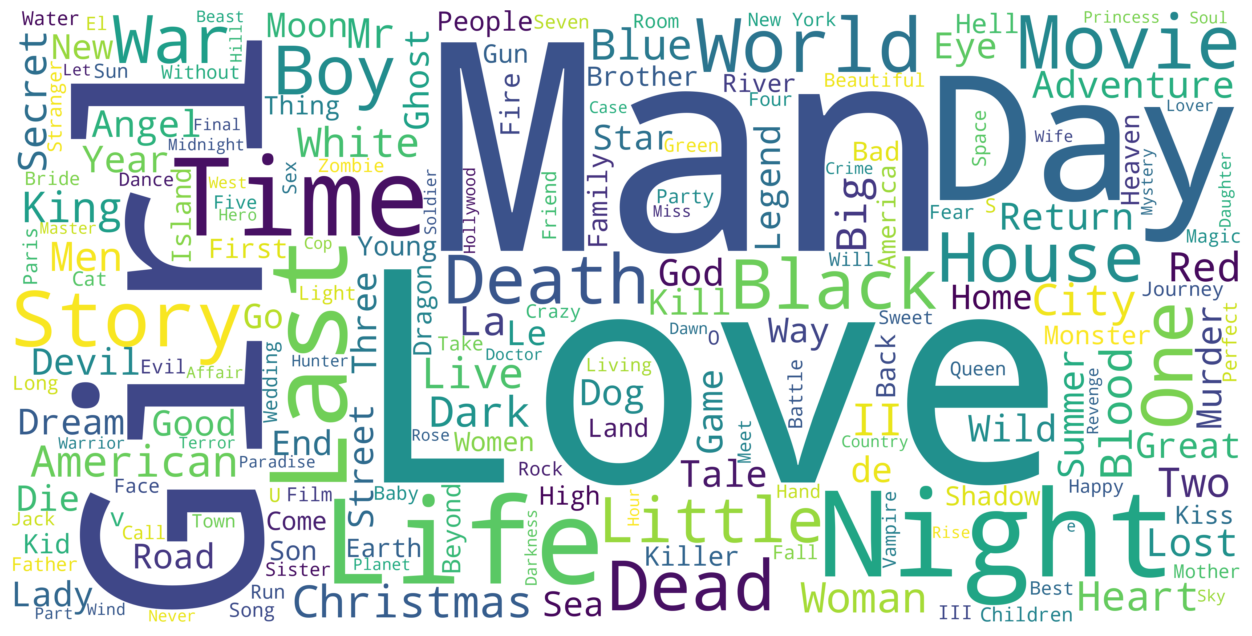

In [342]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [343]:
tagline_wordcloud = WordCloud(background_color ="white", height= 2000, width=4000).generate(tagline_corpus)
tagline_wordcloud

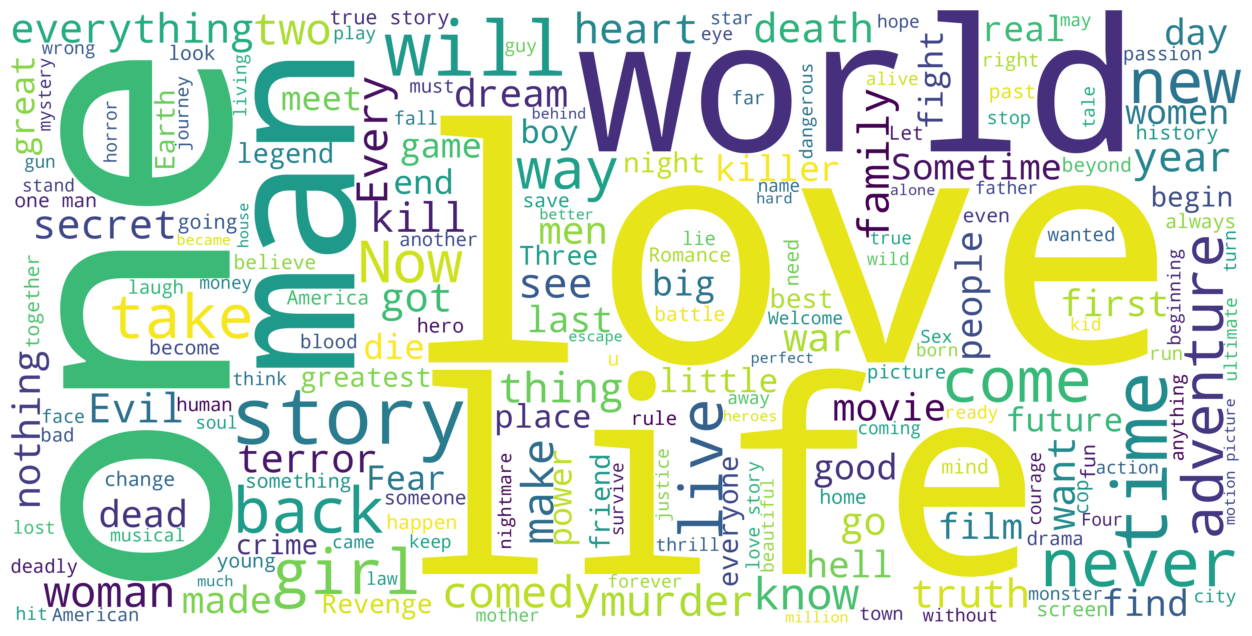

In [344]:
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [345]:
overview_wordcloud = WordCloud(background_color ="white", height= 2000, width=4000).generate(overview_corpus)
overview_wordcloud

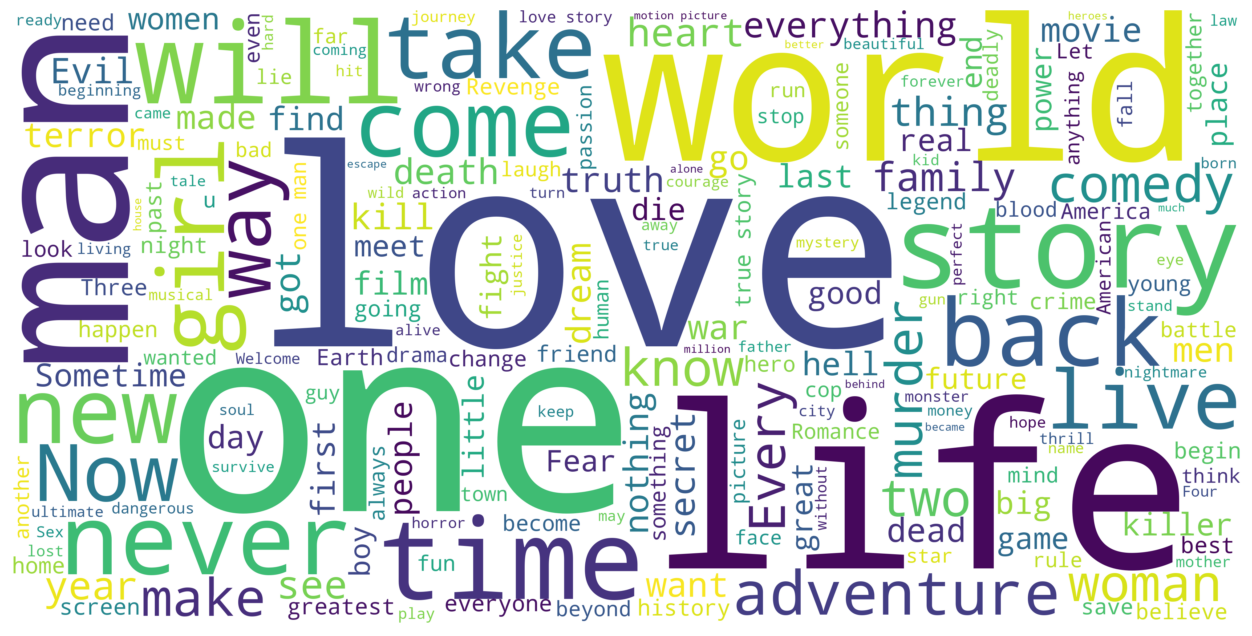

In [346]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Here we see that __title, tagline and overview__ have many words such as love, life, world etc. __in common__.